In [1]:
import torch
from torch import nn, optim

from src.data.sine import get_sine_dataloaders
from src.models.transformer import CustomTransformer
from src.training.helicopter import train_helicopter

train_data, valid_data = get_sine_dataloaders(batch_size=32, shuffle=True)

model = CustomTransformer(max_seq_len=512, d_model=64, num_layers=3, nhead=8, dim_feedforward=128).to("cuda")

# optimizer = optim.SGD(model.parameters(), lr=0.01)
optimizer = optim.Adam(model.parameters(), lr=0.001)
scheduler = optim.lr_scheduler.StepLR(optimizer, 1.0, gamma=0.95)

train_helicopter(
    train_data=train_data, 
    valid_data=valid_data, 
    model=model, 
    optimizer=optimizer, 
    scheduler=scheduler, 
    mask_strategy="random noise",
    loss_strategy="complete",
    random_mask_prop=0.40, 
    noise_std=0.05,
    epochs=10, 
    checkpoints=200,
    device="cuda")


c:\Users\maxho\anaconda3\envs\transformer-anomaly-detection\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Epoch 1:


Validating ...: 100%|██████████| 125/125 [00:03<00:00, 34.37it/s]


Epoch 1/10, Train loss: 0.0003324282459759464, Valid loss: 6.11562782432884e-05
Epoch 2:


Validating ...: 100%|██████████| 125/125 [00:03<00:00, 34.62it/s]


Epoch 2/10, Train loss: 5.878794915430869e-05, Valid loss: 7.141173537820578e-05
Epoch 3:


Validating ...: 100%|██████████| 125/125 [00:03<00:00, 34.54it/s]


Epoch 3/10, Train loss: 5.000231341691688e-05, Valid loss: 6.200307913240977e-05
Epoch 4:


Validating ...: 100%|██████████| 125/125 [00:03<00:00, 34.49it/s]


Epoch 4/10, Train loss: 4.310052091411004e-05, Valid loss: 5.392706955899484e-05
Epoch 5:


Validating ...: 100%|██████████| 125/125 [00:03<00:00, 34.39it/s]


Epoch 5/10, Train loss: 3.4374348964774984e-05, Valid loss: 4.642861770116724e-05
Epoch 6:


Validating ...: 100%|██████████| 125/125 [00:03<00:00, 34.24it/s]


Epoch 6/10, Train loss: 2.8767366061219945e-05, Valid loss: 4.662077379180119e-05
Epoch 7:


Validating ...: 100%|██████████| 125/125 [00:03<00:00, 34.26it/s]


Epoch 7/10, Train loss: 2.4355835106689482e-05, Valid loss: 3.331440899637528e-05
Epoch 8:


Validating ...: 100%|██████████| 125/125 [00:03<00:00, 34.24it/s]


Epoch 8/10, Train loss: 2.121953667374328e-05, Valid loss: 3.730659974098671e-05
Epoch 9:


Validating ...: 100%|██████████| 125/125 [00:03<00:00, 40.42it/s]


Epoch 9/10, Train loss: 1.9106825474106397e-05, Valid loss: 3.3794150309404357e-05
Epoch 10:


Validating ...: 100%|██████████| 125/125 [00:03<00:00, 40.56it/s]

Epoch 10/10, Train loss: 1.7503743833124948e-05, Valid loss: 2.931531402282417e-05


In [2]:
torch.save(model, "denoisingautoencoderhyperparams.save")

In [8]:
# import torch
# from torch import nn
# from src.data.helicopter import get_helicopter_dataloaders
# from src.models.transformer import CustomTransformer
from src.plotting import plot_attention_weights

# train_data, valid_data = get_helicopter_dataloaders(batch_size=24, shuffle=True, device="cuda")


for batch in valid_data:
    batch = batch.to("cuda")
    break

mask = (torch.FloatTensor(batch.shape).uniform_() > 1.4).to("cuda")
noise = (torch.randn_like(batch) * 0.05).to("cuda")

# model = torch.load("noise.save")
# model = CustomTransformer(max_seq_len=512, d_model=512).to("cuda")

pred_batch, layer_attn_weights = model(batch + (mask*noise))

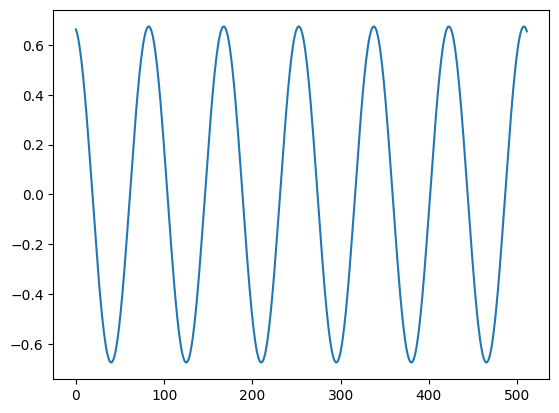

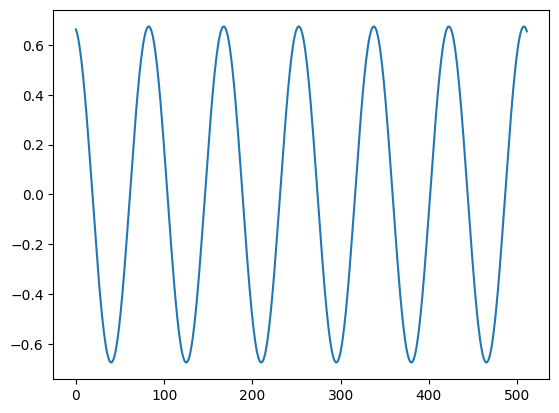

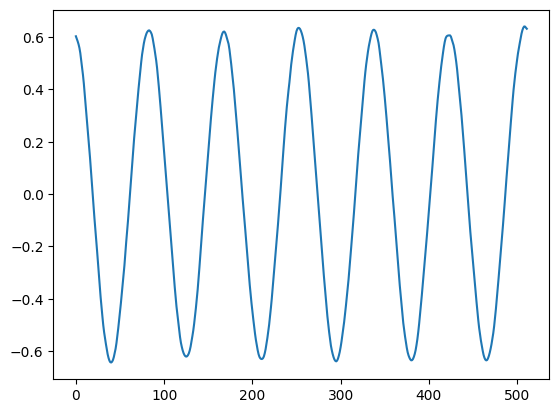

In [9]:
import matplotlib.pyplot as plt

idx = 5

plt.plot((batch).cpu().detach()[idx])
plt.show()
plt.plot((batch + mask*noise).cpu().detach()[idx])
plt.show()
plt.plot((pred_batch).cpu().detach()[idx])
plt.show()

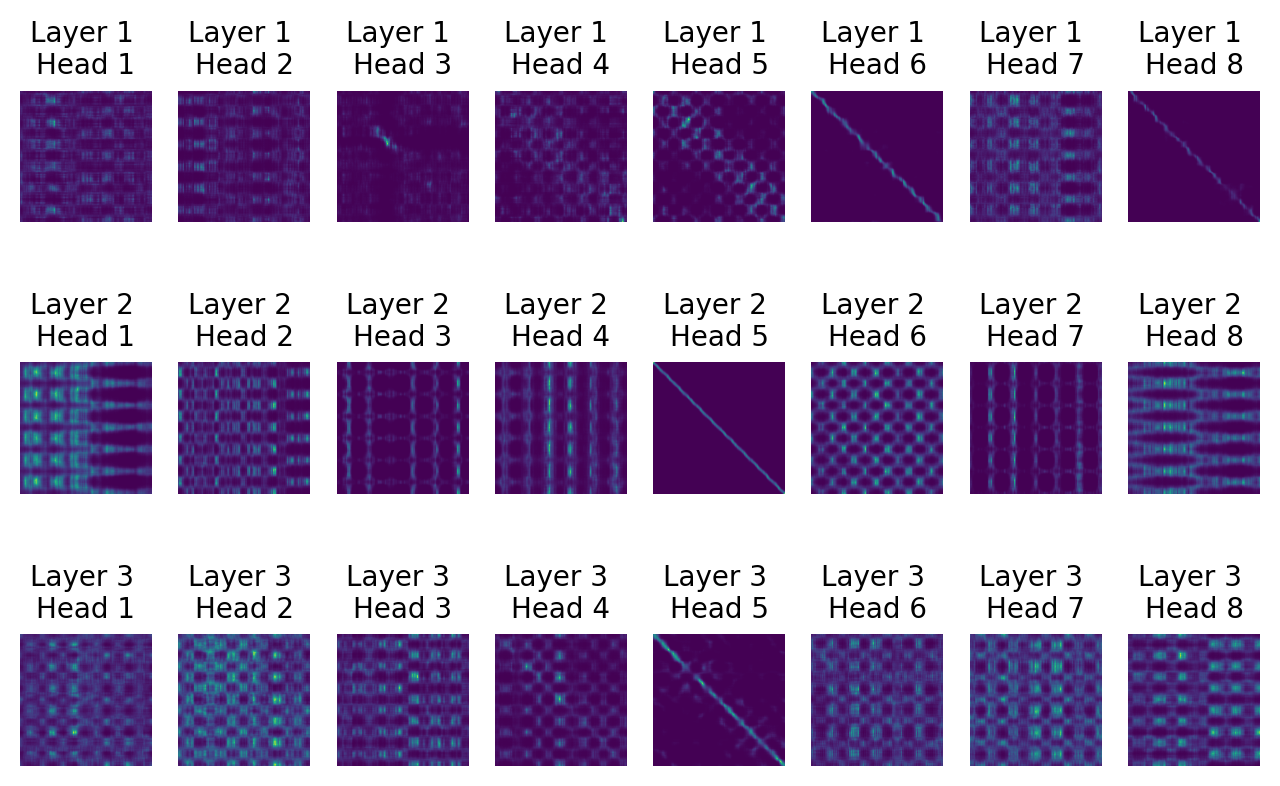

In [10]:
plot_attention_weights(layer_attn_weights.cpu().detach().numpy(), 5)